In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [2]:
from category_encoders import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.utils.validation import check_is_fitted

In [3]:
def wrangle(file_path):
    conn = sqlite3.connect(file_path)
    
    query = """
    select distinct(i.building_id) as b_id, b.*, bd.damage_grade from id_map i
    join building_structure b
    on i.building_id = b.building_id
    join building_damage bd
    on i.building_id = bd.building_id
    where i.district_id = 36
    """
    df = pd.read_sql(query, conn, index_col='b_id')

    drop_cols = [col for col in df.columns if 'post_eq' in col]

    df['damage_grade'] = df['damage_grade'].str[-1].astype(int)
    df['severe_grade'] = (df['damage_grade']>3).astype(int)
    
    drop_cols.append('damage_grade')
    drop_cols.append('count_floors_pre_eq')

    drop_cols.append('building_id')
    df.drop(columns=drop_cols, inplace=True)

    return df

In [4]:
df = wrangle("C:\\Users\\USER\\nepal_eq.db")

In [57]:
df.head()

,age_building,foundation_type,ground_floor_type,height_ft_pre_eq,land_surface_condition,other_floor_type,plan_configuration,plinth_area_sq_ft,position,roof_type,superstructure,severe_grade
b_id,,,,,,,,,,,,
3.601060e+11,4,Mud mortar-Stone/Brick,Mud,18,Flat,TImber/Bamboo-Mud,Rectangular,280,Not attached,Bamboo/Timber-Light roof,mud_mortar_stone,1
3.601060e+11,15,Mud mortar-Stone/Brick,Mud,18,Flat,Not applicable,Rectangular,120,Attached-1 side,Bamboo/Timber-Light roof,mud_mortar_stone,1
3.601070e+11,25,Mud mortar-Stone/Brick,Mud,14,Flat,TImber/Bamboo-Mud,Rectangular,300,Not attached,Bamboo/Timber-Light roof,mud_mortar_stone,1
3.601070e+11,22,Mud mortar-Stone/Brick,Mud,16,Flat,TImber/Bamboo-Mud,Rectangular,155,Not attached,Bamboo/Timber-Light roof,mud_mortar_stone,1
3.602020e+11,20,Mud mortar-Stone/Brick,Brick/Stone,14,Flat,TImber/Bamboo-Mud,Rectangular,240,Attached-1 side,Bamboo/Timber-Heavy roof,mud_mortar_stone,1


In [58]:
dfs =df[df['severe_grade'] == 0]
dfs

,age_building,foundation_type,ground_floor_type,height_ft_pre_eq,land_surface_condition,other_floor_type,plan_configuration,plinth_area_sq_ft,position,roof_type,superstructure,severe_grade
b_id,,,,,,,,,,,,
3.601080e+11,40,Mud mortar-Stone/Brick,Mud,18,Flat,TImber/Bamboo-Mud,Rectangular,280,Not attached,Bamboo/Timber-Light roof,mud_mortar_stone,0
3.601080e+11,38,Mud mortar-Stone/Brick,Mud,17,Flat,TImber/Bamboo-Mud,Rectangular,270,Not attached,Bamboo/Timber-Heavy roof,mud_mortar_stone,0
3.601080e+11,18,Mud mortar-Stone/Brick,Mud,13,Flat,TImber/Bamboo-Mud,Rectangular,260,Not attached,Bamboo/Timber-Light roof,mud_mortar_stone,0
3.601080e+11,22,Mud mortar-Stone/Brick,Mud,18,Flat,TImber/Bamboo-Mud,Rectangular,280,Not attached,Bamboo/Timber-Heavy roof,mud_mortar_stone,0
3.601080e+11,50,Mud mortar-Stone/Brick,Mud,14,Flat,TImber/Bamboo-Mud,Rectangular,280,Not attached,Bamboo/Timber-Light roof,mud_mortar_stone,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3.667090e+11,3,RC,RC,10,Flat,Not applicable,Rectangular,1081,Not attached,RCC/RB/RBC,cement_mortar_stone,0
3.667090e+11,1,Cement-Stone/Brick,RC,10,Flat,Not applicable,Rectangular,667,Not attached,RCC/RB/RBC,cement_mortar_stone,0
3.667090e+11,1,Cement-Stone/Brick,RC,20,Flat,RCC/RB/RBC,Rectangular,504,Not attached,RCC/RB/RBC,cement_mortar_stone,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78074 entries, 360106001171.0 to 366709001281.0
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age_building            78074 non-null  int64 
 1   foundation_type         78074 non-null  object
 2   ground_floor_type       78074 non-null  object
 3   height_ft_pre_eq        78074 non-null  int64 
 4   land_surface_condition  78074 non-null  object
 5   other_floor_type        78074 non-null  object
 6   plan_configuration      78074 non-null  object
 7   plinth_area_sq_ft       78074 non-null  int64 
 8   position                78074 non-null  object
 9   roof_type               78074 non-null  object
 10  superstructure          78074 non-null  object
 11  severe_grade            78074 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 7.7+ MB


In [7]:
from collections import Counter

In [8]:
class_counter = Counter(df['severe_grade'])
class_counter

Counter({1: 49661, 0: 28413})

In [9]:
foundation_pivot = pd.pivot_table(
    df, index = 'foundation_type', values = 'severe_grade', aggfunc='mean'
).sort_values(by = 'severe_grade')

foundation_pivot

,severe_grade
foundation_type,
RC,0.027134
Bamboo/Timber,0.321429
Cement-Stone/Brick,0.410200
Mud mortar-Stone/Brick,0.684101
Other,0.801020


In [10]:
major, minor = df.severe_grade.value_counts(normalize=True)

major, minor

(0.6360760304326665, 0.3639239695673336)

<Figure size 500x300 with 0 Axes>

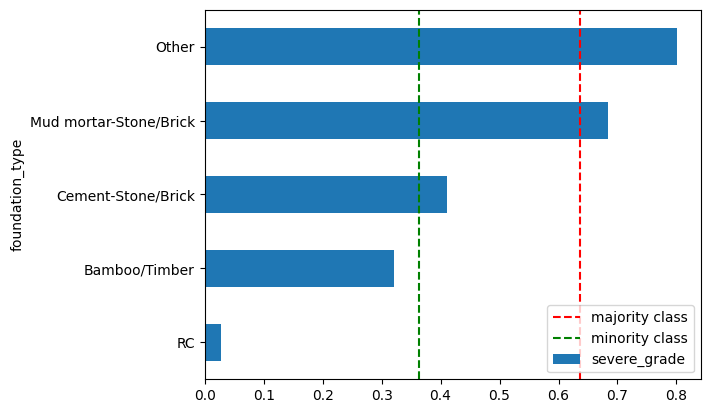

In [11]:
plt.figure(figsize=(5,3))
foundation_pivot.plot(kind='barh')
plt.axvline(
    major, linestyle= '--', color='red', label='majority class'
)
plt.axvline(
    minor, linestyle='--', color='green', label='minority class'
)
plt.legend(loc= 'lower right')
plt.show()

In [12]:
df.select_dtypes('object').nunique()

foundation_type            5
ground_floor_type          5
land_surface_condition     3
other_floor_type           4
plan_configuration        10
position                   4
roof_type                  3
superstructure            11
dtype: int64

In [13]:
target = 'severe_grade'
X = df.drop(target, axis=1)
y=df[target]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [15]:
acc_baseline = y_train.value_counts(normalize=True).max()
acc_baseline

np.float64(0.636865783954274)

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
model = Pipeline(
    [
        ('oh', OneHotEncoder(use_cat_names=True)),
        ('ss', StandardScaler()),
        ('lr', LogisticRegression())
    ]                  
)    

In [18]:
model.fit(X_train, y_train)

Pipeline(steps=[('oh',
                 OneHotEncoder(cols=['foundation_type', 'ground_floor_type',
                                     'land_surface_condition',
                                     'other_floor_type', 'plan_configuration',
                                     'position', 'roof_type',
                                     'superstructure'],
                               use_cat_names=True)),
                ('ss', StandardScaler()), ('lr', LogisticRegression())])

In [19]:
accuracy_score(y_train, model.predict(X_train))

0.7145167229702685

In [20]:
check_is_fitted(model)

In [21]:
model.score(X_train, y_train)

0.7145167229702685

In [22]:
accuracy_score(y_test, model.predict(X_test))

0.7087415946205572

In [23]:
features = model.named_steps['oh'].get_feature_names_out()
importances = model.named_steps['lr'].coef_[0]

In [24]:
feat_imp = pd.Series(np.exp(importances), index = features).sort_values()
feat_imp                 

superstructure_cement_mortar_brick                    0.770751
foundation_type_RC                                    0.801339
superstructure_rc_non_engineered                      0.819915
roof_type_RCC/RB/RBC                                  0.825133
ground_floor_type_RC                                  0.867995
superstructure_rc_engineered                          0.874712
other_floor_type_RCC/RB/RBC                           0.915711
superstructure_cement_mortar_stone                    0.917605
superstructure_other                                  0.925885
superstructure_mud_mortar_brick                       0.930922
plan_configuration_Multi-projected                    0.946230
superstructure_bamboo                                 0.949858
foundation_type_Bamboo/Timber                         0.950939
superstructure_timber                                 0.953249
plan_configuration_L-shape                            0.957442
land_surface_condition_Flat                           0

<Axes: >

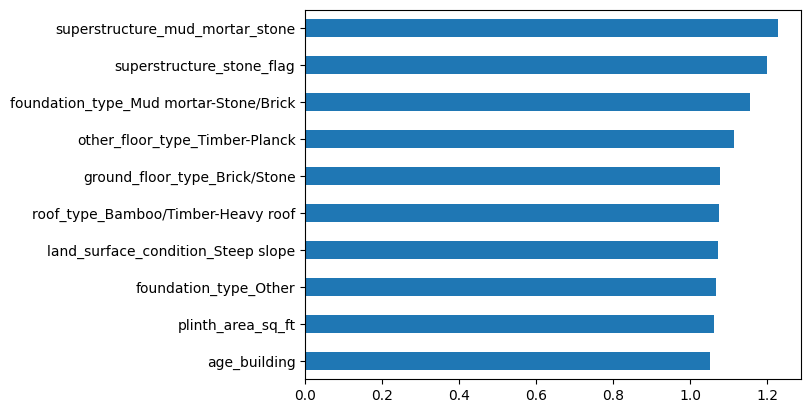

In [25]:
feat_imp.tail(10).plot(kind='barh')

<Axes: >

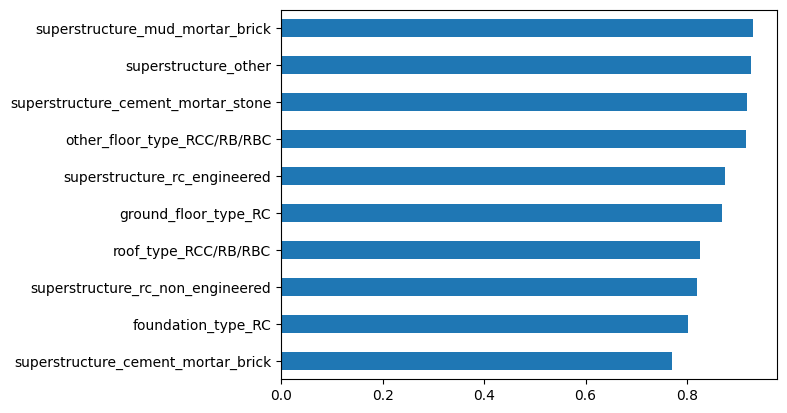

In [26]:
feat_imp.head(10).plot(kind='barh')

In [27]:
import pickle

In [31]:
with open('nepal.pkl', 'wb') as f:
    pickle.dump(model, f)

In [53]:
X_train.superstructure.unique()

array(['mud_mortar_stone', 'cement_mortar_brick', 'rc_non_engineered',
       'stone_flag', 'adobe_mud', 'mud_mortar_brick', 'timber',
       'cement_mortar_stone', 'rc_engineered', 'bamboo', 'other'],
      dtype=object)

In [39]:
X_train.nunique()

age_building               124
foundation_type              5
ground_floor_type            5
height_ft_pre_eq            55
land_surface_condition       3
other_floor_type             4
plan_configuration          10
plinth_area_sq_ft         1186
position                     4
roof_type                    3
superstructure              11
dtype: int64